In [1]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import imageio

# GitHubのリポジトリから実行の場合
img_arr = imageio.imread('/content/drive/MyDrive/Colab Notebooks/book3/data/p1ch4/image-dog/bobby.jpg')

# Google Colaboratoryの場合
# /data/p1ch4/image-dog/bobby.jpgを選択・アップロードしてください
# from google.colab import files

# uploade = files.upload()
# img_arr = imageio.imread('bobby.jpg')

img_arr.shape  # (720, 1280, 3)


(720, 1280, 3)

In [4]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)

In [5]:
out.shape

torch.Size([3, 720, 1280])

#### Permute

In [6]:
x = torch.randn(2, 3, 5)
x

tensor([[[ 0.8844,  0.1206, -0.9970,  0.2298,  0.7828],
         [ 0.9705, -0.0092, -0.0229, -0.5265,  1.5156],
         [-1.1360,  1.0582, -1.8952,  0.1396,  0.9924]],

        [[-0.1262, -1.9986, -0.8172, -0.8893, -1.4953],
         [-0.7091, -1.7709,  0.3272,  0.6122,  1.0871],
         [-0.4230, -0.4408, -1.1278, -0.8836, -0.2086]]])

In [8]:
x.size()

torch.Size([2, 3, 5])

In [9]:
x_permute = torch.permute(x, (2, 0, 1))
x_permute.size()

torch.Size([5, 2, 3])

In [10]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

In [11]:
batch

tensor([[[[0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0],
          ...,
          [0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0]],

         [[0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0],
          ...,
          [0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0]],

         [[0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0],
          ...,
          [0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0]]],


        [[[0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0],
          ...,
          [0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0]],

         [[0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0],
          ...,
          [0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0]],

         [[0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0],
          ...,
          [0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0]]],


        [[[0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0],
          ...,
          [0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0]],

         [[0, 0,  ..., 0, 0],
       

In [ ]:
import os

# data_dir = '../data/p1ch4/image-cats/'
data_dir = '/content/drive/MyDrive/Colab Notebooks/book3/data/p1ch4/image-cats/'

filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3]  # <1>
    batch[i] = img_t

# <1> 
# ここでは前から3次元を取得するように指定しています。
# これは画像によっては透明度を表すアルファ値が4次元目にあるからです

In [12]:
batch = batch.float()
batch /= 255.0

In [13]:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

In [14]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [15]:
import imageio

# GitHubのリポジトリから実行の場合
# dir_path = "../data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083"
dir_path = "/content/drive/MyDrive/Colab Notebooks/book3/data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083"
# Google Colaboratoryの場合
# [1]
# /data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083を自身のGoogleDriveにアップロードしてください
# [2]　
# Google Driveを使えるようにマウントします。
# urlが出てくるのでクリックし、Googleのアカウントを選択し、許可をして、コードをコピーし、以下の実行欄に
# 貼り付けます。すると　Mounted at /content/drive　と表示されます
# from google.colab import drive 
# drive.mount('/content/drive')


In [16]:
# dir_pathはGoogle Driveにフォルダをどうアップロードしたかに依存します
#dir_path = "./drive/My Drive/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%)2/99 files (2.0%)3/99 files (3.0%)4/99 files (4.0%)5/99 files (5.1%)6/99 files (6.1%)7/99 files (7.1%)8/99 files (8.1%)9/99 files (9.1%)10/99 files (10.1%)11/99 files (11.1%)12/99 files (12.1%)13/99 files (13.1%)14/99 files (14.1%)15/99 files (15.2%)16/99 files (16.2%)17/99 files (17.2%)18/99 files (18.2%)19/99 files (19.2%)20/99 files (20.2%)21/99 files (21.2%)22/99 files (22.2%)23/99 files (23.2%)24/99 files (24.2%)25/99 files (25.3%)26/99 files (26.3%)27/99 files (27

(99, 512, 512)

In [19]:
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)

vol.shape

torch.Size([1, 99, 512, 512])

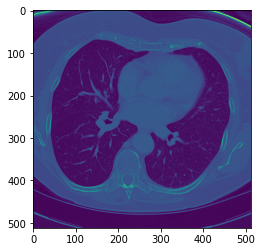

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[50])

In [21]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, precision=2, linewidth=75)

In [22]:
import csv

# GitHubのリポジトリから実行の場合
wine_path = "/content/drive/MyDrive/Colab Notebooks/book3/data/p1ch4/tabular-wine/winequality-white.csv"

# Google Colaboratoryの場合
# /data/p1ch4/tabular-wine/winequality-white.csvを選択・アップロードしてください
# from google.colab import files
# uploade = files.upload()

#wine_path = "winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";",
                         skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [23]:
# 基本的にnextは一番上のカラムデータをスキップするためのもの
col_list = next(csv.reader(open(wine_path), delimiter=';'))

wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [25]:
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [26]:
data = wineq[:, :-1] # <1>
data, data.shape

(tensor([[ 7.00,  0.27,  ...,  0.45,  8.80],
         [ 6.30,  0.30,  ...,  0.49,  9.50],
         ...,
         [ 5.50,  0.29,  ...,  0.38, 12.80],
         [ 6.00,  0.21,  ...,  0.32, 11.80]]), torch.Size([4898, 11]))

In [27]:
target = wineq[:, -1] # <2>
target, target.shape

(tensor([6., 6.,  ..., 7., 6.]), torch.Size([4898]))

In [29]:
target = wineq[:, -1].long()
target, target.shape

(tensor([6, 6,  ..., 7, 6]), torch.Size([4898]))

In [30]:
target_onehot = torch.zeros(target.shape[0], 10)

target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [32]:
target_onehot[0]

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [34]:
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed

tensor([[6],
        [6],
        ...,
        [7],
        [6]])

In [35]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.85e+00, 2.78e-01, 3.34e-01, 6.39e+00, 4.58e-02, 3.53e+01,
        1.38e+02, 9.94e-01, 3.19e+00, 4.90e-01, 1.05e+01])

#### torch.mean

In [37]:
a = torch.arange(24, dtype=torch.float32).reshape(2,3,4)
a.shape, a

(torch.Size([2, 3, 4]), tensor([[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.]],
 
         [[12., 13., 14., 15.],
          [16., 17., 18., 19.],
          [20., 21., 22., 23.]]]))

In [38]:
torch.mean(a,0)

tensor([[ 6.,  7.,  8.,  9.],
        [10., 11., 12., 13.],
        [14., 15., 16., 17.]])

In [39]:
torch.mean(a,1)

tensor([[ 4.,  5.,  6.,  7.],
        [16., 17., 18., 19.]])

In [40]:
torch.mean(a,2)

tensor([[ 1.50,  5.50,  9.50],
        [13.50, 17.50, 21.50]])

In [41]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.12e-01, 1.02e-02, 1.46e-02, 2.57e+01, 4.77e-04, 2.89e+02,
        1.81e+03, 8.95e-06, 2.28e-02, 1.30e-02, 1.51e+00])

In [42]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.72e-01, -8.18e-02,  ..., -3.49e-01, -1.39e+00],
        [-6.57e-01,  2.16e-01,  ...,  1.34e-03, -8.24e-01],
        ...,
        [-1.61e+00,  1.17e-01,  ..., -9.63e-01,  1.86e+00],
        [-1.01e+00, -6.77e-01,  ..., -1.49e+00,  1.04e+00]])

In [43]:
bad_indexes = target <= 3 # <1>
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [44]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [45]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)] # <1>
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [46]:
total_sulfur_threshold = 141.83
total_sulfur_data = data[:,6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)

predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [47]:
actual_indexes = target > 5

actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [48]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()

n_matches, n_matches / n_predicted, n_matches / n_actual

(2018, 0.74000733406674, 0.6193984039287906)

In [50]:
actual_indexes

tensor([True, True,  ..., True, True])

In [51]:
torch.sum(actual_indexes)

tensor(3258)

In [53]:
torch.sum(actual_indexes).item()

3258

In [80]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50, linewidth=75)

In [84]:
bikes_numpy = np.loadtxt(
    "/content/drive/MyDrive/Colab Notebooks/book3/data/p1ch4/bike-sharing-dataset/hour-fixed.csv", 
    dtype=np.float32, 
    delimiter=",", 
    skiprows=1, 
    converters={1: lambda x: float(x[8:10])}) # <1>
bikes = torch.from_numpy(bikes_numpy)
bikes

tensor([[1.00e+00, 1.00e+00,  ..., 1.30e+01, 1.60e+01],
        [2.00e+00, 1.00e+00,  ..., 3.20e+01, 4.00e+01],
        ...,
        [1.74e+04, 3.10e+01,  ..., 4.80e+01, 6.10e+01],
        [1.74e+04, 3.10e+01,  ..., 3.70e+01, 4.90e+01]])

In [87]:
x = "2011-01-11"
float(x[8:10])

11.0

In [82]:
bikes[10000]

tensor([9.88e+03, 2.10e+01, 1.00e+00, 1.00e+00, 2.00e+00, 1.60e+01,
        0.00e+00, 2.00e+00, 1.00e+00, 1.00e+00, 3.60e-01, 3.33e-01,
        4.60e-01, 4.18e-01, 1.40e+01, 2.40e+02, 2.54e+02])

In [88]:
bikes.shape, bikes.stride()

(torch.Size([17520, 17]), (17, 1))

In [89]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [90]:
daily_bikes = daily_bikes.transpose(1, 2)
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

In [101]:
first_day = bikes[:24].long()
weather_onehot = torch.zeros(first_day.shape[0], 4)
first_day[:,9]

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2,
        2, 2])

In [102]:
bikes[:24].long().shape

torch.Size([24, 17])

In [103]:
weather_onehot

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [92]:
weather_onehot.scatter_(
    dim=1, 
    index=first_day[:,9].unsqueeze(1).long() - 1, # <1>
    value=1.0)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [93]:
torch.cat((bikes[:24], weather_onehot), 1)[:1]

tensor([[ 1.00,  1.00,  1.00,  0.00,  1.00,  0.00,  0.00,  6.00,  0.00,
          1.00,  0.24,  0.29,  0.81,  0.00,  3.00, 13.00, 16.00,  1.00,
          0.00,  0.00,  0.00]])

In [106]:
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4,
                                   daily_bikes.shape[2])
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [107]:
daily_weather_onehot.scatter_(
    1, daily_bikes[:,9,:].long().unsqueeze(1) - 1, 1.0)
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [108]:
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)

In [109]:
daily_bikes[:, 9, :] = (daily_bikes[:, 9, :] - 1.0) / 3.0

In [110]:
temp = daily_bikes[:, 10, :]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - temp_min)
                         / (temp_max - temp_min))

In [111]:
temp = daily_bikes[:, 10, :]
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - torch.mean(temp))
                         / torch.std(temp))

In [112]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [113]:
with open('/content/drive/MyDrive/Colab Notebooks/book3/data/p1ch4/jane-austen/1342-0.txt', encoding='utf8') as f:
    text = f.read()

In [114]:
lines = text.split('\n')
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [115]:
letter_t = torch.zeros(len(line), 128) # <1> 
letter_t.shape

torch.Size([70, 128])

In [116]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0  # <1>
    letter_t[i][letter_index] = 1

In [117]:
def clean_words(input_str):
    punctuation = '.,;:"!?”“_-'
    word_list = input_str.lower().replace('\n',' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [118]:
word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}

len(word2index_dict), word2index_dict['impossible']

(7261, 3394)

In [119]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word]
    word_t[i][word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))
    
print(word_t.shape)


 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him
torch.Size([11, 7261])


In [120]:
word_t = word_t.unsqueeze(1)
word_t.shape

torch.Size([11, 1, 7261])

In [121]:
[(c, ord(c)) for c in sorted(set(text))]


[('\n', 10),
 (' ', 32),
 ('!', 33),
 ('#', 35),
 ('$', 36),
 ('%', 37),
 ("'", 39),
 ('(', 40),
 (')', 41),
 ('*', 42),
 (',', 44),
 ('-', 45),
 ('.', 46),
 ('/', 47),
 ('0', 48),
 ('1', 49),
 ('2', 50),
 ('3', 51),
 ('4', 52),
 ('5', 53),
 ('6', 54),
 ('7', 55),
 ('8', 56),
 ('9', 57),
 (':', 58),
 (';', 59),
 ('?', 63),
 ('@', 64),
 ('A', 65),
 ('B', 66),
 ('C', 67),
 ('D', 68),
 ('E', 69),
 ('F', 70),
 ('G', 71),
 ('H', 72),
 ('I', 73),
 ('J', 74),
 ('K', 75),
 ('L', 76),
 ('M', 77),
 ('N', 78),
 ('O', 79),
 ('P', 80),
 ('Q', 81),
 ('R', 82),
 ('S', 83),
 ('T', 84),
 ('U', 85),
 ('V', 86),
 ('W', 87),
 ('X', 88),
 ('Y', 89),
 ('Z', 90),
 ('[', 91),
 (']', 93),
 ('_', 95),
 ('a', 97),
 ('b', 98),
 ('c', 99),
 ('d', 100),
 ('e', 101),
 ('f', 102),
 ('g', 103),
 ('h', 104),
 ('i', 105),
 ('j', 106),
 ('k', 107),
 ('l', 108),
 ('m', 109),
 ('n', 110),
 ('o', 111),
 ('p', 112),
 ('q', 113),
 ('r', 114),
 ('s', 115),
 ('t', 116),
 ('u', 117),
 ('v', 118),
 ('w', 119),
 ('x', 120),
 ('y',

In [122]:
ord('l'
   )

108

Video
====

In [ ]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

When it comes to the shape of tensors, video data can be seen as equivalent to volumetric data, with `depth` replaced by the `time` dimension. The result is again a 5D tensor with shape `N x C x T x H x W`.

There are several formats for video, especially geared towards compression by exploiting redundancies in space and time. Luckily for us, `imageio` reads video data as well. Suppose we'd like to retain 100 consecutive frames in our 512 x 512 RBG video for classifying an action using a convolutional neural network. We first create a reader instance for the video, that will allow us to get information about the video and iterate over the frames in time.
Let's see what the meta data for the video looks like:

In [ ]:
import imageio

reader = imageio.get_reader('../data/p1ch4/video-cockatoo/cockatoo.mp4')
meta = reader.get_meta_data()
meta

{'plugin': 'ffmpeg',
 'nframes': 280,
 'ffmpeg_version': '4.1 built with gcc 8.2.1 (GCC) 20181017',
 'fps': 20.0,
 'source_size': (1280, 720),
 'size': (1280, 720),
 'duration': 14.0}

We now have all the information to size the tensor that will store the video frames:

In [ ]:
n_channels = 3
n_frames = meta['nframes']
video = torch.empty(n_channels, n_frames, *meta['size'])

video.shape

torch.Size([3, 280, 1280, 720])

Now we just iterate over the reader and set the values for all three channels into in the proper `i`-th time slice.
This might take a few seconds to finish!

In [ ]:
for i, frame_arr in enumerate(reader):
    frame = torch.from_numpy(frame_arr).float()
    video[:, i] = torch.transpose(frame, 0, 2)

In the above, we iterate over individual frames and set each frame in the `C x T x H x W` video tensor, after transposing the channel. We can then obtain a batch by stacking multiple 4D tensors or pre-allocating a 5D tensor with a known batch size and filling it iteratively, clip by clip, assuming clips are trimmed to a fixed number of frames.

Equating video data to volumetric data is not the only way to represent video for training purposes. This is a valid strategy if we deal with video bursts of fixed length. An alternative strategy is to resort to network architectures capable of processing long sequences and exploiting short and long-term relationships in time, just like for text or audio.
// We'll see this kind of architectures when we take on recurrent networks.

This next approach accounts for time along the batch dimension. Hence, we'll build our dataset as a 4D tensor, stacking frame by frame in the batch:


In [ ]:
time_video = torch.empty(n_frames, n_channels, *meta['size'])

for i, frame in enumerate(reader):
    frame = torch.from_numpy(frame).float()
    time_video[i] = torch.transpose(frame, 0, 2)

time_video.shape

torch.Size([280, 3, 1280, 720])

Audio
====

In [ ]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

Sound can be seen as fluctuations of pressure of a medium, air for instance, at a certain location in time. There are other representations that we'll get into in a minute, but we can think about this as the _raw_, time-domain representation. In order for the human ear to appreciate sound, pressure must fluctuate with a frequency between 20 and 20000 oscillations per second (measured in Hertz, Hz). More oscillations per second will lead to a higher perceived pitch.

By recording pressure fluctuations in time using a microphone and converting every pressure level at each time point into a number (e.g. a 16-bit integer), we can now represent sound as a vector of numbers. This is known as Pulse Code Modulation (PCM), where a continuous signal is both sampled in time and quantized in amplitude. If we want to make sure we hear the highest possible pitch in a recording, we'll have to record our samples at slightly more than twice the maximum audible frequency, i.e. just over 40000 times per second. It is not by chance that audio CD's have a sampling frequency of 44100 Hz. This means that a one-hour stereo (i.e. 2 channels) CD track where samples are recorded at 16-bit precision will amount to `2 * 16 * 44100 * 3600 = 5080320000 bit = 605.6 MB` if stored without compression.

There are a plethora of audio formats, WAV, AIFF, MP3, AAC being the most popular, where raw audio signals are typically encoded in compressed form by leveraging on both correlation between successive samples in the time series, between the two stereo channels as well as elimination of barely audible frequencies. This can result in dramatic reduction of storage requirements (a one-hour audio file in AAC format takes less than 60 MB). In addition, audio players can decode these formats on the fly on dedicated hardware, consuming a tiny amount of power.

In our data scientist role we may have to feed audio samples to our network and classify them, or generate captions, for instance. In that case, we won't work with compressed data, rather we'll have to find a way to load an audio file in some format and lay it out as an uncompressed time series in a tensor. Let's do that now.

We can download a fair number of environmental sounds at the ESC-50 repository (https://github.com/karoldvl/ESC-50) in the `audio` directory. Let's get `1-100038-A-14.wav` for instance, containing the sound of a bird chirping.

In order to load the sound we resort to SciPy, specifically `scipy.io.wavfile.read`, which has the nice property to return data as a NumPy array:

In [ ]:
import scipy.io.wavfile as wavfile

freq, waveform_arr = wavfile.read('../data/p1ch4/audio-chirp/1-100038-A-14.wav')
freq, waveform_arr

(44100, array([ -388, -3387, -4634, ...,  2289,  1327,    90], dtype=int16))

The `read` function returns two outputs, namely the sampling frequency and the waveform as a 16-bit integer 1D array. It's a single 1D array, which tells us that it's a mono recording - we'd have two waveforms (two channels) if the sound were stereo.

We can convert the array to a tensor and we're good to go. We might also want to convert the waveform tensor to a float tensor since we're at it.

In [ ]:
waveform = torch.from_numpy(waveform_arr).float()
waveform.shape

torch.Size([220500])

In a typical dataset, we'll have more than one waveform, and possibly over more than one channel. Depending on the kind of network employed for carrying out a task, for instance a sound classification task, we would be required to lay out the tensor in one of two ways.

For architectures based on filtering the 1D signal with cascades of learned filter banks, such as convolutional networks, we would need to lay out the tensor as `N x C x L`, where `N` is the number of sounds in a dataset, `C` the number of channels and `L` the number of samples in time.

Conversely, for architectures that incorporate the notion of temporal sequences, just as recurrent networks we mentioned for text, data needs to be laid out as `L x N x C` - sequence length comes first. Intuitively, this is because the latter architectures take one set of `C` values at a time - the signal is not considered as a whole, but as an individual input changing in time.

Although the most straightforward, this is only one of the ways to represent audio so that it is digestible by a neural network. Anther way is turning the audio signal into a _spectrogram_.

Instead of representing oscillations explicitly in time, we can characterize what at frequencies those oscillations occur for short time intervals. So, for instance, if we pluck the fifth string of our (hopefully tuned) guitar and we focus on 0.1 seconds of that recording, we will see that the waveform oscillates at 440 cycles per second, plus smaller spurious oscillations at different frequencies that make up the timbre of the sound. If we move on to subsequent 0.1 second intervals, we now see that the frequency content doesn't change, but the intensity does, as the sound of our string fades. If we now decide to pluck another string, we will observe new frequencies fading in time.

We could indeed build a plot having time in the X-axis, frequencies heard at that time in the Y-axis and encode intensity of those frequencies as a value at that X and Y. Or color. Ok, that starts to look like an image, right?

That's correct, spectrograms are a representation of the intensity at each frequency at each point in time. It turns out that one can train convolutional neural networks built for analyzing images (we'll see about those in a couple of chapters) on sound represented as a spectrogram.

Let's see how we can turn the sound we loaded earlier into a spectrogram. To do that, we need to resort to a method for converting a signal in the time domain into its frequency content. This is known as the Fourier transform, and the algorithm that allows us to compute it efficiently is the Fast Fourier Trasform (FFT), which is one of the most widespread algorithms out there. If we do that consecutively for short bursts of sound in time, we can build out spectrogram column by column.

This is the general idea and we won't go into too many details here. Luckily for us SciPy has a function that gets us a shiny spectrogram given an input waveform. We import the `signal` module from SciPy,
then provide the `spectrogram` function with the waveform and the sampling frequency that we got previously.
The return values are all NumPy arrays, namely frequency `f_arr` (values along the Y axis), time `t_arr` (values along the X axis) and the actual spectrogra `sp_arr` as a 2D array. Turning the latter into a PyTorch tensor is trivial:


In [ ]:
from scipy import signal

f_arr, t_arr, sp_arr = signal.spectrogram(waveform_arr, freq)

sp_mono = torch.from_numpy(sp_arr)
sp_mono.shape

torch.Size([129, 984])


Dimensions are `F x T`, where `F` is frequency and `T` is time.

As we mentioned earlier, stereo sound has two channels, which will lead to a two-channel spectrogram. Suppose we have two spectrograms, one for each channel. We can convert the two channels separately:


In [ ]:
sp_left = sp_right = sp_arr
sp_left_t = torch.from_numpy(sp_left)
sp_right_t = torch.from_numpy(sp_right)
sp_left_t.shape, sp_right_t.shape

(torch.Size([129, 984]), torch.Size([129, 984]))


and stack the two tensors along the first dimension to obtain a two channels image of size `C x F x T`, where `C` is the number channels:

In [ ]:
sp_t = torch.stack((sp_left_t, sp_right_t), dim=0)
sp_t.shape

torch.Size([2, 129, 984])

If we want to build a dataset to use as input for a network, we will stack multiple spectrograms representing multiple sounds in a dataset along the first dimension, leading to a `N x C x F x T` tensor.

Such tensor is indistinguishable from what we would build for a dataset set of images, where `F` is represents rows and `T` columns of an image. Indeed, we would tackle a sound classification problem on spectrograms with the exact same networks.

第4章の章末演習問題
====


### [1] 携帯電話やデジタルカメラで、赤、青、緑の物体の写真を何枚か撮りましょう（カメラがない場合は、インターネットからダウンロードすることもできます）。
※ ここではGoogle Colaraboratoryでの実行を想定しています。


※本フォルダに、無料写真素材　写真AC（商用利用可）のデータを配置しています。

apple.jpg、sky.jpg、forest.jpg


https://www.photo-ac.com/main/detail/345453?title=%E3%83%AA%E3%83%B3%E3%82%B4&searchId=68658080

https://www.photo-ac.com/main/detail/3343123?title=%E3%81%99%E3%81%A3%E3%81%8D%E3%82%8A%E6%99%B4%E3%82%8C%E3%82%84%E3%81%8B%E3%81%AA%E5%A4%8F%E3%81%AE%E7%A9%BA&searchId=68660407

https://www.photo-ac.com/main/detail/3518379?title=%E6%A8%B9%E6%9C%A8_%E6%A3%AE%E6%9E%97_3&searchId=68662146



#### （a）各画像を読み込み、テンソルに変換してください。

In [ ]:
# 回答

In [ ]:
import numpy as np
import torch 

# Google Colaboratoryの場合
# /章末の演習問題/apple.jpgを選択・アップロードしてください
# /章末の演習問題/sky.jpgを選択・アップロードしてください
# /章末の演習問題/forest.jpgを選択・アップロードしてください

from google.colab import files
uploade = files.upload()

In [ ]:
uploade = files.upload()

In [ ]:
uploade = files.upload()

In [ ]:
from PIL import Image

file_name = "apple.jpg"
img = Image.open(file_name)
img

In [ ]:
import imageio

file_name = "apple.jpg"
img = imageio.imread(file_name)
img_t = torch.from_numpy(img)
img_t = img_t.permute(2, 0, 1)
img_t = img_t[:3].float()
print(img_t.shape)

In [ ]:
def convert_jpg_2_tensor(file_name):
    img = imageio.imread(file_name)
    img_t = torch.from_numpy(img)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3].float()
    return img_t

file_name = "forest.jpg"
img_forest_t = convert_jpg_2_tensor(file_name)
print(img_forest_t.shape)

In [ ]:
file_name = "sky.jpg"
img_sky_t = convert_jpg_2_tensor(file_name)
print(img_sky_t.shape)

#### (b）各画像テンソルについて、.mean()メソッドを使用して、画像の明るさを求めてください。

In [ ]:
# 回答

In [ ]:
file_name = "apple.jpg"
img_apple_t = convert_jpg_2_tensor(file_name)
print(img_apple_t.shape)

In [ ]:
print(img_apple_t.mean())
print(img_forest_t.mean())
print(img_sky_t.mean())


#### （c）各画像の各チャンネルの平均を取ってください。求めたチャンネルの平均値だけから、赤、緑、青の物体を識別できるか確認してください。

In [ ]:
# 回答

In [ ]:
print(img_apple_t.mean(dim=1).mean(dim=1))
print(img_forest_t.mean(dim=1).mean(dim=1))
print(img_sky_t.mean(dim=1).mean(dim=1))

# appleの最大値はRチャネル、forestの最大値はGチャネル、skyの最大値はBチャネルとなっている

### [2] Pythonのソースコードを含む比較的大きなファイルを用意してください。

※https://github.com/YutaroOgawa/pytorch_advanced/blob/master/1_image_classification/utils/dataloader_image_classification.py

をフォルダ内に用意しています。


#### （a）ソースファイル内のすべての単語のインデックスを作成してください (トークン化はシンプルにしても複雑にしても構いません。 最初は正規表現r"[^a-zA-Z0-9_]+"とスペースで、単語を一度置き換えることをおすすめします)。

In [ ]:
# 回答


In [ ]:
# Google Colaboratoryの場合
# /章末の演習問題/dataloader_image_classification.pyを選択・アップロードしてください
from google.colab import files
uploade = files.upload()

with open('dataloader_image_classification.py', encoding='utf8') as f:
    text = f.read()

In [ ]:
# 正規表現で抽出
import re
words_in_file = re.findall(r"[a-zA-Z0-9_]+", text)

print(words_in_file)


In [ ]:
# 重複を消し、並び替える
word_list = list(set(words_in_file))
word_list = sorted(word_list)



In [ ]:
print(word_list)
print(len(word_list))

In [ ]:
# インデックス化
word2index_dict = {word: i for (i, word) in enumerate(word_list)}

print(len(word2index_dict))


#### （b）本章の「高慢と偏見」で作ったインデックスと比較してみてください。どちらの方がサイズは大きいですか？

In [ ]:
# 回答

In [ ]:
# 「高慢と偏見」で作ったインデックスで、len(word2index_dict)は7261種類の単語があった。
# 今回は、90種類のみ
#  前回の方がサイズは大きい

#### （c）ソースコードファイルのワンホットエンコーディングを作成してください。

In [ ]:
# 回答

In [ ]:
# 辞書化
word_t = torch.zeros(len(words_in_file), len(word2index_dict))
for i, word in enumerate(words_in_file):
    word_index = word2index_dict[word]
    word_t[i][word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))
    
print(word_t.shape)


In [ ]:
# 格納する空のテンソルを用意
word_onehot_t = torch.zeros(word_t.shape[0], word_t.shape[1])
print(word_onehot_t)
print(word_onehot_t.shape)


In [ ]:
# words_in_fileの単語をindexに置き換える
print(words_in_file)

In [ ]:
index_in_file_t = torch.zeros(len(words_in_file))
print(index_in_file_t.shape)

In [ ]:
# 文字列をindex列に 
for i, word in enumerate(words_in_file):
    word_index = word2index_dict[word]
    index_in_file_t[i] = torch.tensor(word_index)

# long型に
index_in_file_t = index_in_file_t.long()

print(index_in_file_t)
print(index_in_file_t[0])
print(index_in_file_t[0].dtype)

In [ ]:
# ワンホットエンコーディングしたベクトルを作成
word_onehot_t.scatter_(
    dim=1, 
    index=index_in_file_t.unsqueeze(1),
    value=1.0)

print(word_onehot_t.shape)


In [ ]:
# ファイルの最初の単語はimport。インデックス番号は54。
print(word_onehot_t[0])
print(word_onehot_t[0][54])

# 54番目だけ1になっている、ワンホットエンコーディング表現

#### （d）今回のエンコーディングで失われる情報は何でしょうか？本章での「高慢と偏見」のエンコーディングで失われた情報と比較してみてください。

In [ ]:
# 回答

In [ ]:
#　省略

以上。
